# Partie 1 : PageRank - version itérative, premier exemple



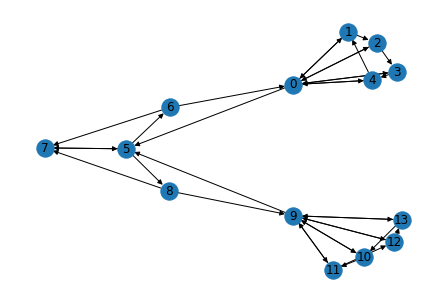

In [58]:
import networkx as nx
from numpy import *
import matplotlib.pyplot as plt
import random as rd

A = array([[0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
[1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
[1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
[1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
[1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
[0,0,0,0,0,0,1,1,1,0,0,0,0,0],
[1,0,0,0,0,0,0,1,0,0,0,0,0,0],
[0,0,0,0,0,1,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,1,0,1,0,0,0,0],
[0,0,0,0,0,1,0,0,0,0,1,1,1,1],
[0,0,0,0,0,0,0,0,0,1,0,1,0,0],
[0,0,0,0,0,0,0,0,0,1,0,0,1,0],
[0,0,0,0,0,0,0,0,0,1,0,0,0,1],
[0,0,0,0,0,0,0,0,0,1,1,0,0,0]])

G1 = nx.DiGraph(A)
pos = nx.circular_layout(G1)
nx.draw(G1,with_labels=True)
plt.show()


## Question 1

Voici l'algorithme de la puissance itérée :

In [21]:
def norme(X):
    norm = 0
    for i in range(len(X)):
        norm = norm + X[i]**2
    return sqrt(norm)

def puissance_iteree(e, M):
    Xbis = []
    for i in range(len(M)):
        Xbis.append(rd.randint(0, 100))
    Xbis = array(Xbis)
    while (True):
        prevXbis = Xbis
        Xbis = (M.dot(Xbis)) / norme(M.dot(Xbis))
        if (norme(Xbis - prevXbis) < e):
            break
    return norme(M.dot(Xbis)), Xbis

Et voici l'algorithme de transformation en matrice PageRank :

In [ ]:
def nombreLinks(M, j):
    count = 0
    for i in range(len(M)):
        count = count + M[i][j]
    return count;

def pageRankMatrice(M):
    Q = M
    N = len(Q)
    for i in range(N):
        for j in range(N):
            if (nombreLinks(M, j) != 0):
                Q[i][j] = Q[i][j] / nombreLinks(M, j)
            else:
                Q[i][j] = 0
    return Q

L'algorithme de la puissance itérée permet de calculer la valeur propre la plus grande et le vecteur propre associé d'une matrice "M".  
Ce vecteur propre "v" a la particularité d'être solution de l'équation :  
    v = M v  
  
Or en regardant le principe de l'algorithme de PageRank et son explication en notations matricielles, on remarque que le principe est le même :  
Le vecteur r des scores est solution de l'équation r = Q r  où Q est la matrice d'adjacence des scores.  

## Question 2

In [31]:
# Application de l'algo transition 1 PageRank
A2 = pageRankMatrice(A)
#print("Matrice PageRank obtenue :")
#print(A2)
print()
print("Valeur propre trouvée :")
print(puissance_iteree(10**-5, A2)[0])
print()
print("Vecteur de scores trouvé :")
print(puissance_iteree(10**-5, A2)[1])


Valeur propre trouvée :
1.2775159595942898

Vecteur de scores trouvé :
[0.14980509 0.05770128 0.06562517 0.07224862 0.07308413 0.17112546
 0.07522368 0.05740872 0.12425253 0.63075538 0.29729804 0.34443671
 0.38484628 0.39077158]


Vérification du vecteur des scores :

In [35]:
l,r = puissance_iteree(10**-5, A2)

print("Norme de r : ")
print(norme(r))
print("Valeur de r :")
print(r)
print()
print("Norme de Ar :")
print(l)
print("Valeur de Ar :")
print(A2.dot(r))
print()
print("Vérifications")
print("Norme de Ar - r :")
print(norme(A2.dot(r) - r))
print("Valeur de Ar - r :")
print(A2.dot(r) - r)


Norme de r : 
1.0
Valeur de r :
[0.14980121 0.05769952 0.06562318 0.07224646 0.07308195 0.17112375
 0.07522191 0.05740812 0.12425241 0.63075613 0.29729874 0.34443749
 0.38484712 0.39077242]

Norme de Ar :
1.2775157674320796
Valeur de Ar :
[0.1913668  0.07370903 0.08383126 0.09229229 0.09335962 0.21861037
 0.09609417 0.07333875 0.15873421 0.80580218 0.37980503 0.44002567
 0.49164971 0.49921935]

Vérifications
Norme de Ar - r :
0.2775157676006038
Valeur de Ar - r :
[0.04156559 0.01600951 0.01820807 0.02004583 0.02027767 0.04748662
 0.02087226 0.01593063 0.0344818  0.17504605 0.08250629 0.09558818
 0.10680259 0.10844694]


En tentant de faire la vérification numérique avec linalg.solve(A, r), la fonction renvoie une erreur LinAlgError de type Singular matrix.  
  
Nous avons donc réalisé la vérification manuellement en faisant la soustraction entre Ar et r et en vérifiant la valeur de la norme de r.  
De ce que l'on peut observer, la norme de r se rapproche effectivement de 1 et la différence entre Ar et r est proche de 0, avec une marge de 0.1 en moyenne.  
Ce n'est effectivement pas le plus préci des résultats mais cela reste un résultat correct.  


# Partie 2 : PageRank - version itérative, deuxième example

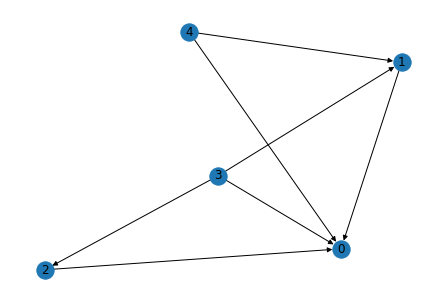

In [59]:
B = array([[0.0,0.0,0.0,0.0,0.0],
[1.0,0.0,0.0,0.0,0.0],
[1.0,0.0,0.0,0.0,0.0],
[1.0,1.0,1.0,0.0,0.0],
[1.0,1.0,0.0,0.0,0.0]])

G2 = nx.DiGraph(B)
pos = nx.circular_layout(G2)
nx.draw(G2,with_labels=True)
plt.show()

## Question 1

In [38]:
# Application de l'algo transition 1 PageRank
B2 = pageRankMatrice(B)

print(B2)

print("Resultat des scores : ")
print(puissance_iteree(10**-5, B2)[1])

[[0.         0.         0.         0.         0.        ]
 [0.25       0.         0.         0.         0.        ]
 [0.30769231 0.         0.         0.         0.        ]
 [0.39097744 0.5        1.         0.         0.        ]
 [0.51317059 0.66666667 0.         0.         0.        ]]
Resultat des scores : 


/tmp/ipykernel_3181/3589164236.py:17: RuntimeWarning: invalid value encountered in true_divide
  Xbis = (M.dot(Xbis)) / norme(M.dot(Xbis))


KeyboardInterrupt: 

En appliquant l'algorithme de la partie 1, on se retrouve avec une erreur. Il est donc probable que la matrice PageRank transition B2 ne puisse par être traitée par un algorithme de puissance itérée car les vecteurs de score formés ont des normes nulles.  
  
On va définir un algorithme qui renvoie une matrice de transition secondaire pour palier à ce problème :  

In [40]:
def transitionMatrice(M, a):
    P = M
    N = len(P)
    for i in range(N):
        for j in range(N):
            if (nombreLinks(M, j) != 0):
                P[i][j] = a*M[i][j] + ((1 - a)/N)
            else:
                P[i][j] = 1/N
    return P


## Question 2


In [51]:
B3 = transitionMatrice(B2, 0.85)

print("Matrice de transition pour B :")
print(B3)
print()

l,r = puissance_iteree(10**-5, B3)

print("Norme de r : ")
print(norme(r))
print("Valeur de r :")
print(r)
print()

print("Norme de B3 r :")
print(l)
print("Valeur de B3 r :")
print(B3.dot(r))
print()

print("Vérifications")
print("Norme de B3 r - r :")
print(norme(B3.dot(r) - r))
print("Valeur de B3 r - r :")
print(B3.dot(r) - r)

Matrice de transition pour B :
[[0.14671835 0.15506932 0.16062512 0.26863429 0.26863429]
 [0.1885837  0.15570826 0.16062512 0.1882424  0.1882424 ]
 [0.20179977 0.15628093 0.16062512 0.18267646 0.18267646]
 [0.21995303 0.24989361 0.35749952 0.1785619  0.1785619 ]
 [0.24577089 0.28405358 0.16062512 0.17541151 0.17541151]]

Norme de r : 
1.0
Valeur de r :
[0.4552537  0.39591889 0.39672742 0.51639074 0.4603697 ]

Norme de B3 r :
0.9979150188603264
Valeur de B3 r :
[0.45430468 0.39509339 0.39590019 0.5153141  0.4594097 ]

Vérifications
Norme de B3 r - r :
0.0020849811528608556
Valeur de B3 r - r :
[-0.00094902 -0.0008255  -0.00082722 -0.00107664 -0.00096   ]


Grâce à cet algorithme de transition, il est désormais possible de calculer les scores PageRank de matrices auquelles l'algorithme de puissance itérée ne peux normalement pas s'appliquer.  
De plus, on remarque que le calcul des scores est beaucoup plus précis car le vecteur différence entre B3 et r a maintenant une marge d'environ 0.05 en moyenne. Une nette amélioration par rapport aux résultats de la partie 1.  
  
Voici donc le nouvel algorithme "iterativePageRank" :  


In [47]:
def iterativePageRank(M, e, a):
    M2 = pageRankMatrice(M)
    M2 = transitionMatrice(M2, a)
    return puissance_iteree(e, M2)
